In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c
from astropy import units as u

# 1D Brownian Motion

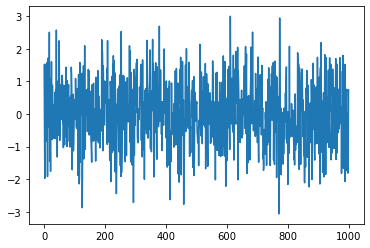

In [30]:
N = 1000
displacement = np.random.randn(N)

plt.figure()
plt.plot(displacement);

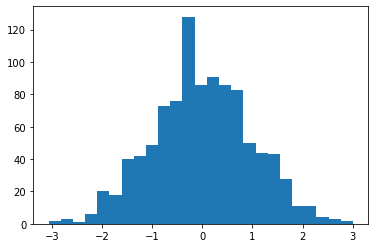

In [31]:
plt.figure()
_ = plt.hist(displacement, bins=25);

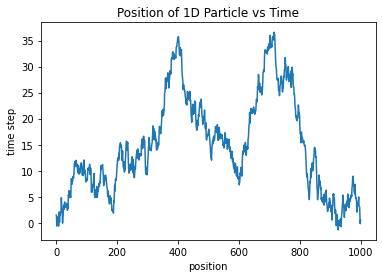

In [32]:
x = np.cumsum(displacement)

plt.figure()
plt.plot(x)
plt.xlabel("position")
plt.ylabel("time step")
plt.title("Position of 1D Particle vs Time");

# 2D particle simulation

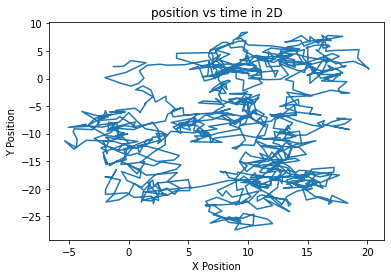

In [36]:
particle_x = np.cumsum(np.random.randn(N))
particle_y = np.cumsum(np.random.randn(N))

plt.figure()
plt.plot(particle_x, particle_y)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("position vs time in 2D");

# Compute the Displacement Squared

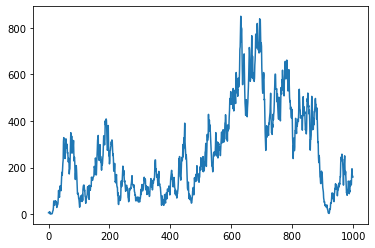

In [37]:
dsquared = particle_x**2 + particle_y**2

plt.figure()
plt.plot(dsquared);

# Theoretical Value of D

In [38]:
d = 1e-6*u.m               # diameter in meters
eta = 1e-3*u.Pa*u.second   # viscosity of water in SI units (Pascal-seconds) at 293 K
T = 293*u.Kelvin           # Temperature in Kelvin

D = T*c.k_B / (3*np.pi*eta*d)

D

<Quantity 4.29219827e-13 J / (m Pa s)>

# A more realistic particle - Getting the Units Right

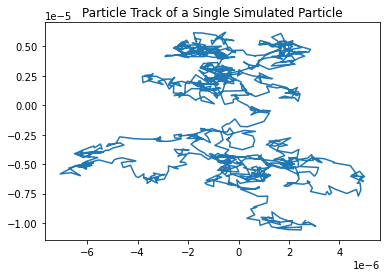

In [40]:
dimensions = 2
tau = 0.1*u.second
time = tau*np.arange(N)

k = np.sqrt(D*dimensions*tau)
dx = k * np.random.randn(N)
dy = k * np.random.randn(N)

x = np.cumsum(dx)
y = np.cumsum(dy)

d_squared_displacement = dx**2 + dy**2
squared_displacement = x**2 + y**2

plt.figure()
plt.plot(x, y)
plt.title("Particle Track of a Single Simulated Particle");

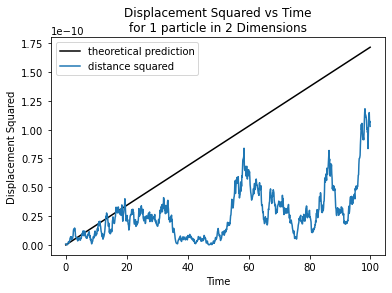

In [41]:
plt.figure()

plt.plot(time, np.arange(N)*2*k**2, color="k", label="theoretical prediction")
plt.plot(time, squared_displacement, label="distance squared")

plt.xlabel("Time")
plt.ylabel("Displacement Squared")
plt.title("Displacement Squared vs Time\nfor 1 particle in 2 Dimensions")
plt.legend()

# Estimating D from the Simulated Data

In [42]:
simulated_D = np.mean(d_squared_displacement/(2*dimensions*tau))
simulated_D

<Quantity 4.58664332e-13 J / (m Pa s)>

# Uncertainty in the Estimate

In [43]:
standard_error = np.std(d_squared_displacement) / (2*dimensions*tau*np.sqrt(N))
actual_error = D - simulated_D

print("standard error = %s"%standard_error)
print("actual error =   %s"%actual_error)

standard error = 1.4767914800725168e-14 J / (m Pa s)
actual error =   -2.944450433065088e-14 J / (m Pa s)


# Systematic Error -- Bulk Flow in the Solvent

Simulated D =    6.86978646555102e-13 J / (m Pa s)
Standard Error = 2.0494395434919594e-14 J / (m Pa s)
Actual Error =   -2.5775881911316534e-13 J / (m Pa s)


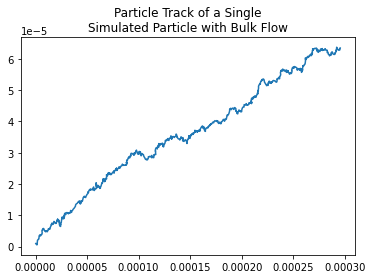

In [48]:
dx =dx + 0.2*k
dy = dy + 0.05*k

x = np.cumsum(dx)
y = np.cumsum(dy)

d_squared_displacement = dx**2 + dy**2
squared_displacement = x**2 + y**2

simulated_D = np.mean(d_squared_displacement) / (2*dimensions*tau)
standard_error = np.std(d_squared_displacement) / (2*dimensions*tau*np.sqrt(N))
actual_error = D - simulated_D

plt.figure()
plt.plot(x, y)
plt.title("Particle Track of a Single\nSimulated Particle with Bulk Flow");

print(f"Simulated D =    {simulated_D}")
print(f"Standard Error = {standard_error}")
print(f"Actual Error =   {actual_error}")

# Displacement Squared in the Presence of Bulk Flow

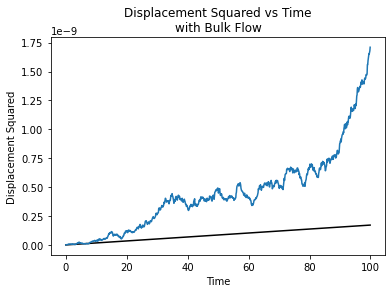

In [13]:
plt.figure()
plt.plot(time, np.arange(N)*2*k**2, color="k")
plt.plot(time, squared_displacement)

plt.xlabel("Time")
plt.ylabel("Displacement Squared")
plt.title("Displacement Squared vs Time\nwith Bulk Flow");

# Simulating Multiple Particles

In [14]:
class Obj:
    pass

In [15]:
particle_count = 10
N = 50
tau = 0.1*u.second
time = np.arange(N)*tau
particles = []

for i in range(particle_count):
    p = Obj()
    p.dx = k*np.random.randn(N)
    p.x = np.cumsum(p.dx)
    p.dy = k*np.random.randn(N)
    p.y = np.cumsum(p.dy)
    p.dr_squared = p.dx**2 + p.dy**2
    p.r_squared = p.x**2 + p.y**2
    p.D = np.mean(p.dr_squared) / (2*dimensions*tau)
    p.standard_error = np.std(p.dr_squared) / (2*dimensions*tau*np.sqrt(N))
    particles.append(p)

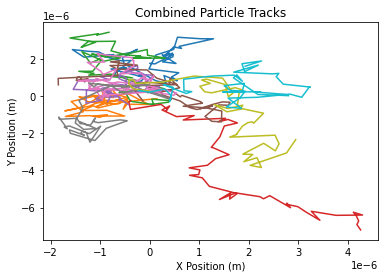

In [16]:
particle_count = 10

for i in range(particle_count):
    plt.plot(particles[i].x, particles[i].y)
    
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Combined Particle Tracks");

# Displacement Squared

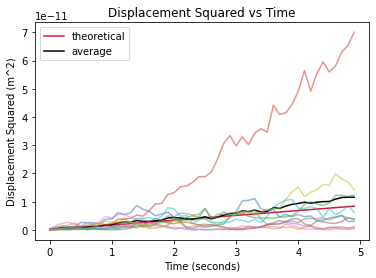

In [17]:
r_squared_sum = np.zeros(N)

for i in range(particle_count):
    r_squared_sum = r_squared_sum + particles[i].r_squared
    
ensemble_average = r_squared_sum / particle_count

plt.figure()
plt.plot(time, np.arange(N)*2*k**2, label="theoretical", color="crimson")

plt.plot(time, ensemble_average, 'k', label="average")
for i in range(particle_count):
    plt.plot(time, particles[i].r_squared, alpha=0.5)

plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel('Displacement Squared (m^2)')
plt.title('Displacement Squared vs Time');

# Estimated Value of D

Text(0.5, 1.0, 'Estimated Diffusion Coefficient with Error Bars')

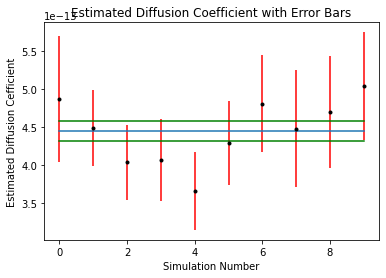

In [18]:
D = []
dx = []
e = []

for i in range(particle_count):
    D.append(particles[i].D.value)
    dx.append(particles[i].dx.value)
    e.append(particles[i].standard_error.value)
    
D = np.asarray(D)
dx = np.asarray(dx)
e = np.asarray(e)

average_D = np.mean(D)
uncertainty = np.std(D)/np.sqrt(particle_count)

plt.figure()
plt.plot(average_D*np.ones(particle_count))
plt.plot((average_D + uncertainty)*np.ones(particle_count), color="green")
plt.plot((average_D - uncertainty)*np.ones(particle_count), color="green")
plt.errorbar(np.arange(len(D)), D, yerr=e, fmt=".k", ecolor="red")

plt.xlabel("Simulation Number")
plt.ylabel("Estimated Diffusion Cefficient")
plt.title("Estimated Diffusion Coefficient with Error Bars")

# Fancy Statistics and Plots

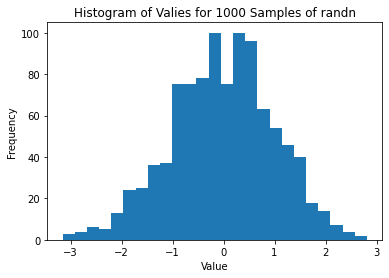

In [19]:
plt.figure()
_ = plt.hist(np.random.randn(10**3), bins=25)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Valies for 1000 Samples of randn");

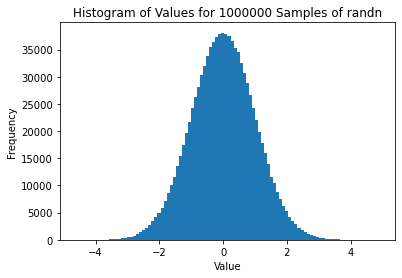

In [20]:
plt.figure()
_ = plt.hist(np.random.randn(10**6), bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values for 1000000 Samples of randn');

# Sampling Uncertainty

/Users/DanielBautista/opt/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/DanielBautista/opt/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


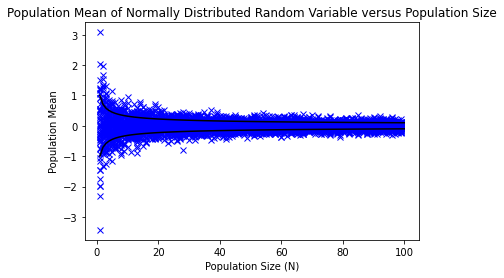

In [21]:
for i in range(100):
    for j in range(50):
        y = np.random.randn(i)
        m = np.mean(y)
        plt.plot(i, m, "x", color="blue")
        
plt.plot(np.arange(100)+1, 1/np.sqrt(np.arange(100)+1), color="black")
plt.plot(np.arange(100)+1, -1/np.sqrt(np.arange(100)+1), color="black")

plt.xlabel('Population Size (N)')
plt.ylabel('Population Mean')
plt.title('Population Mean of Normally Distributed Random Variable versus Population Size');

# What Happens when you Square a Random Variable?

2.0000245389092095
2.0000229247142594


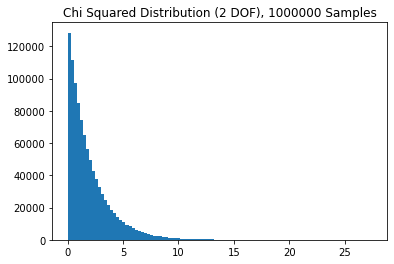

In [22]:
dx = np.random.randn(10**6)
dy = np.random.randn(10**6)
dr_squared = dx**2 + dy**2

print(np.mean(dr_squared))
print(np.var(dx) + np.var(dy))

plt.figure()
_ = plt.hist(dr_squared, bins=100)
plt.title('Chi Squared Distribution (2 DOF), 1000000 Samples');

# 100 Years of BIO Lab Data in 1 second

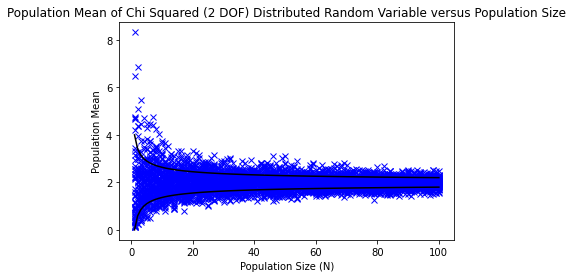

In [23]:
plt.figure()
for i in range(1, 101):
    for j in range(50):
        dx = np.random.randn(i)
        dy = np.random.randn(i)
        m = np.mean(dx**2 + dy**2)
        plt.plot(i, m, "x", color="blue")
        
plt.plot(np.arange(100)+1, 2 + 2/np.sqrt(np.arange(100)+1), color="black")
plt.plot(np.arange(100)+1, 2 - 2/np.sqrt(np.arange(100)+1), color="black")

plt.xlabel("Population Size (N)")
plt.ylabel("Population Mean")
plt.title('Population Mean of Chi Squared (2 DOF) Distributed Random Variable versus Population Size');

# Auto Correlation - A closer look at the data

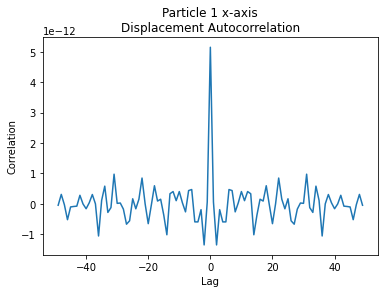

In [27]:
cc = np.correlate(particles[1].dx.value, particles[1].dx.value, mode="full")
xaxis = np.linspace((1-len(cc))/2, (len(cc)-1)/2, len(cc))

plt.plot(xaxis, cc)
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.title("Particle 1 x-axis\nDisplacement Autocorrelation");

# Cross Correlation

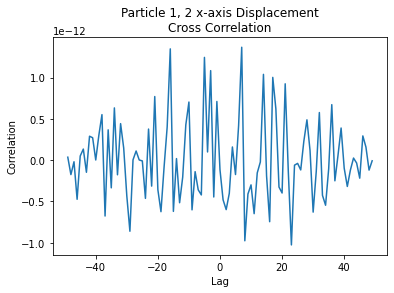

In [25]:
cc = np.correlate(particles[1].dx.value, particles[2].dx.value, mode="full")
xaxis = np.linspace((1-len(cc))/2, (len(cc)-1)/2, len(cc))

plt.plot(xaxis, cc)
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.title("Particle 1, 2 x-axis Displacement\nCross Correlation");

# A Correlated Trajectory

Text(0.5, 1.0, 'Autocorrelation')

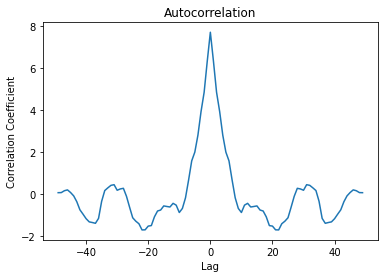

In [26]:
x = np.zeros(N)
c_val = 0.8
step = np.random.randn(N)
x[0] = np.random.randn()

for i in range(1, len(x)):
    x[i] = (c_val * x[i-1]) + ((1-c_val)*step[i])
    
plt.figure()
plt.plot(xaxis, np.correlate(x, x, mode="full"))

plt.xlabel("Lag")
plt.ylabel("Correlation Coefficient")
plt.title("Autocorrelation")